In [ ]:
TITANIC SURVIVAL PREDICTION

In [16]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head().style.set_properties(**{'background-color': 'Black',
                           'color': 'white',
                           'border-color': 'darkblack'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [3]:
df_drop_Col = df.drop(['PassengerId','Name','Ticket'],axis=1)
df_drop_Col.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
df_drop_rows = df.drop(labels=[0,1,3,6],axis=0)
df_drop_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,4.000000,0.000000,0.000000,7.225000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
35%,312.500000,0.000000,2.000000,24.000000,0.000000,0.000000,9.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
85%,757.500000,1.000000,3.000000,45.000000,1.000000,1.000000,56.495800


In [7]:
df[df['Survived']==0].describe().T.style.background_gradient \
(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
PassengerId,549.000000,447.016393,260.640469,1.000000,211.000000,455.000000,675.000000,891.000000
Survived,549.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass,549.000000,2.531876,0.735805,1.000000,2.000000,3.000000,3.000000,3.000000
Age,424.000000,30.626179,14.172110,1.000000,21.000000,28.000000,39.000000,74.000000
SibSp,549.000000,0.553734,1.288399,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,549.000000,0.329690,0.823166,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,549.000000,22.117887,31.388207,0.000000,7.854200,10.500000,26.000000,263.000000


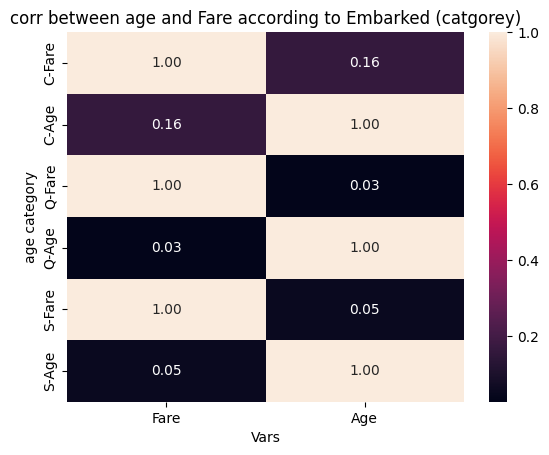

In [8]:
df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].corr()
corr = df.groupby(["Embarked"])[["Fare" , "Age"]].corr()
corr.head()

sns.heatmap(corr , annot=True , fmt =".2f")
plt.xlabel("Vars")
plt.ylabel("age category")
plt.title("corr between age and Fare according to Embarked (catgorey)")
plt.show()

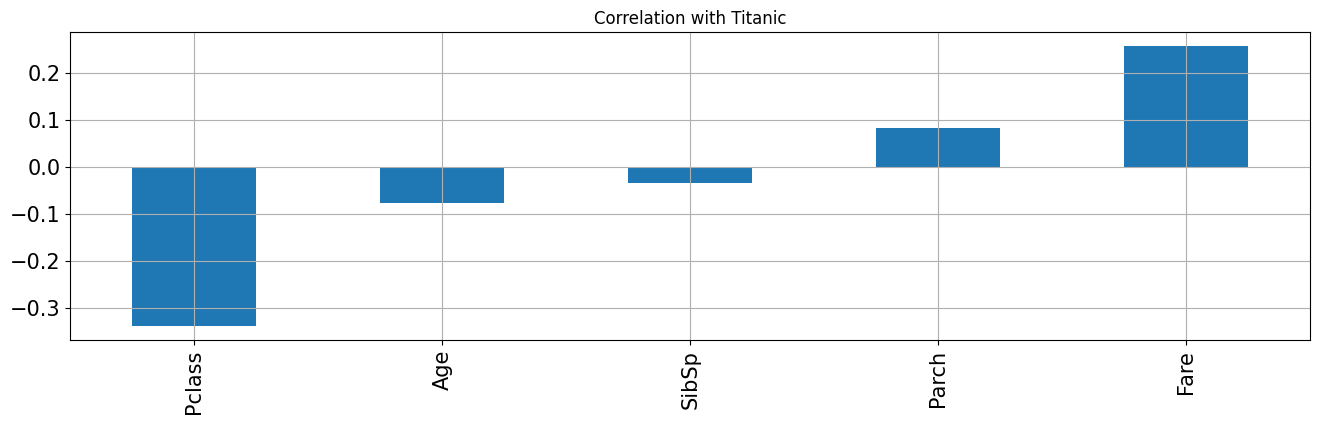

In [9]:
X = df[['Pclass', 'Age', 'SibSp','Parch', 'Fare']]
y = df['Survived']
X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Titanic", fontsize = 15,
        rot = 90, grid = True)
plt.show()

In [10]:
df[['Age','Fare','Pclass']].agg(['sum','max','mean','std','skew','kurt'])

,Age,Fare,Pclass
sum,21205.170000,28693.949300,2057.000000
max,80.000000,512.329200,3.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
skew,0.389108,4.787317,-0.630548
kurt,0.178274,33.398141,-1.280015


In [11]:
df.groupby("Embarked").agg({"Fare": np.mean, "Sex": np.size})

,Fare,Sex
Embarked,,
C,59.954144,168
Q,13.276030,77
S,27.079812,644


In [12]:
df.pivot_table(index='Pclass',values='Age', aggfunc=np.median)

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [13]:
x=pd.DataFrame(pd.pivot_table(df,index=['Sex','Embarked'],aggfunc='count')['Fare'])
x

Fare
Sex    Embarked      
female C           73
       Q           36
       S          203
male   C           95
       Q           41
       S          441

In [14]:
df['Embarked'].value_counts().to_frame()

,count
Embarked,
S,644
C,168
Q,77
